In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [2]:
dataset = pd.read_csv("..\\DATA\\processed_stock_data.csv")

In [3]:
print(dataset.shape)

(416, 12)


In [4]:
dataset.head()

,Unnamed: 0,ticker,list_date,market_cap,mkt_cap_low,mkt_cap_high,lower_offer_pr,upper_offer_pr,final_offer_price,over_sub_ratio,allot_odds,firstday_return
0,0,06618.HK,2020/12/08,1963.81-2207.09,1963.81,1963.81,62.800,70.58,70.580,420.9,0.4,0.00000
1,1,02110.HK,2020/12/07,5.00-6.00,5.00,5.00,0.225,0.27,0.225,35.8,0.2,-0.14667
2,2,06666.HK,2020/12/02,918.92-1054.05,918.92,918.92,8.500,9.75,8.800,9.7,0.5,-0.00227
3,3,06996.HK,2020/11/20,105.58-120.81,105.58,105.58,15.800,18.08,18.080,263.8,0.2,0.01106
4,4,01516.HK,2020/11/19,316.50-379.50,316.50,316.50,10.550,12.65,11.600,9.4,0.3,0.21897


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         416 non-null    int64  
 1   ticker             416 non-null    object 
 2   list_date          416 non-null    object 
 3   market_cap         416 non-null    object 
 4   mkt_cap_low        416 non-null    float64
 5   mkt_cap_high       416 non-null    float64
 6   lower_offer_pr     416 non-null    float64
 7   upper_offer_pr     416 non-null    float64
 8   final_offer_price  416 non-null    float64
 9   over_sub_ratio     416 non-null    float64
 10  allot_odds         416 non-null    float64
 11  firstday_return    416 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 39.1+ KB


### Columns 4-10 will be used for training, column 11 is Y

In [6]:
X, y = dataset.iloc[:, 4:-1], dataset.iloc[:,-1]

In [7]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [10]:
xg_reg.fit(X_train,y_train)

[14:31:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10)

In [11]:
preds = xg_reg.predict(X_test)

In [12]:
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.576309


# Params modified here

In [13]:
params = {"objective":"reg:linear",'colsample_bytree': 0.2,'learning_rate': 0.5,
                'max_depth': 3, 'alpha': 10}

In [14]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[14:31:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:31:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:31:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.530998,0.020468,0.532679,0.033070
1,0.504761,0.025882,0.507624,0.036915
2,0.488890,0.025664,0.491444,0.042378
3,0.483413,0.025847,0.486628,0.044071
4,0.480210,0.026729,0.484953,0.045646


In [16]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.478618
Name: test-rmse-mean, dtype: float64


In [17]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[14:31:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


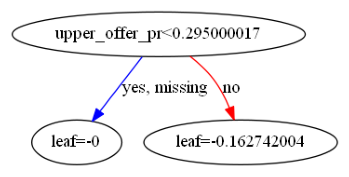

In [18]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

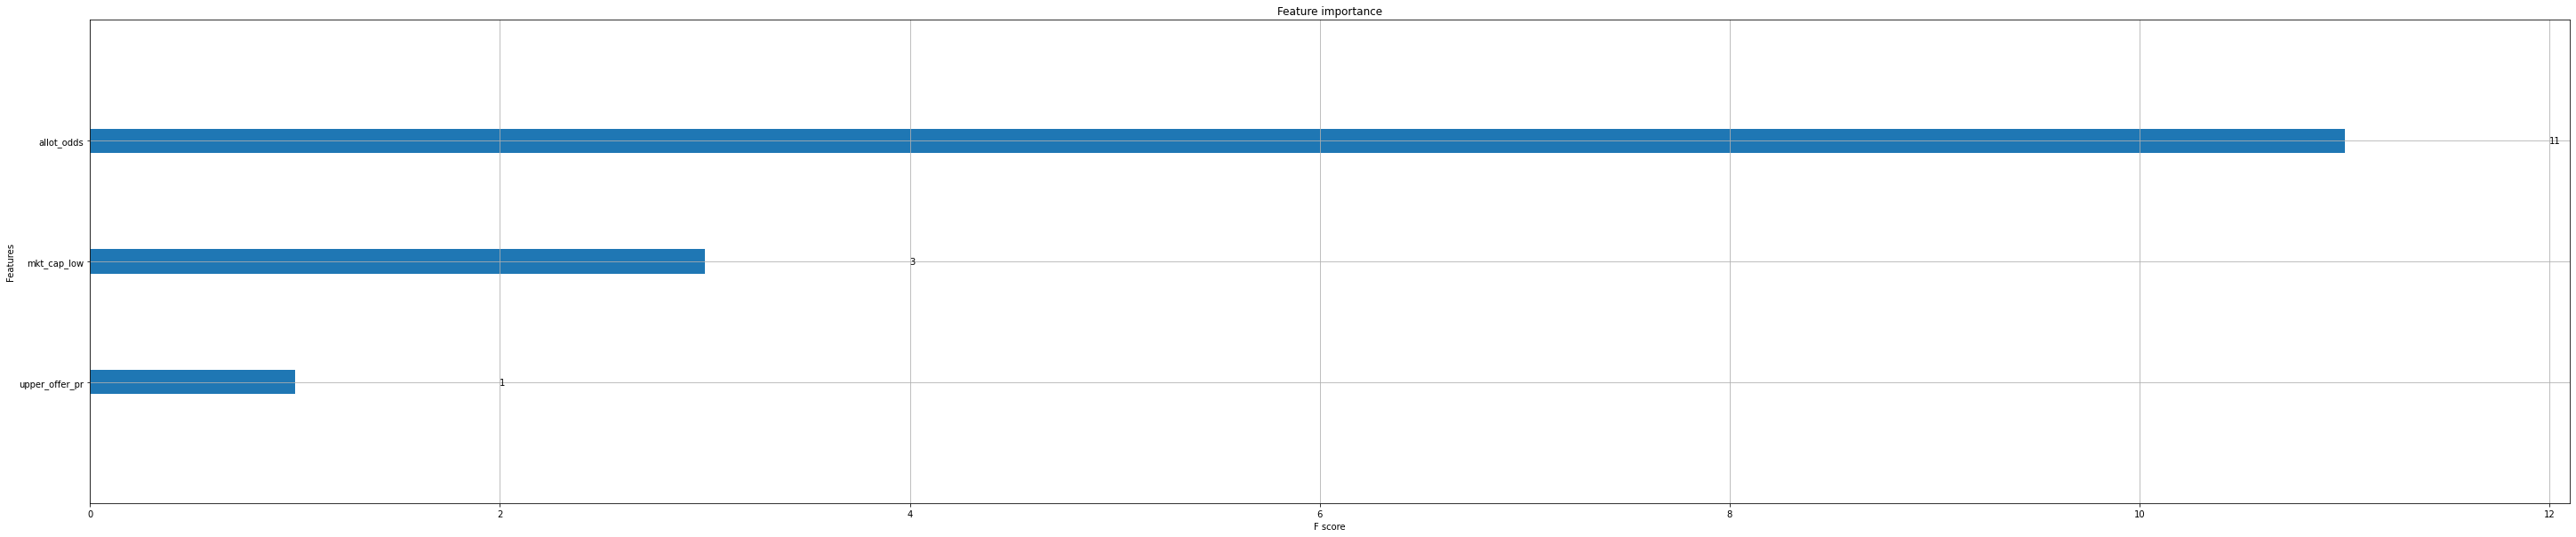

In [19]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()